In [33]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### [작업1] 데이터 처리할 폴더할당

In [41]:
data_dir='c:\\data\\flower_photos\\'
dataList=glob(data_dir + '/*')
dataList

['c:\\data\\flower_photos\\daisy',
 'c:\\data\\flower_photos\\dandelion',
 'c:\\data\\flower_photos\\LICENSE.txt',
 'c:\\data\\flower_photos\\roses',
 'c:\\data\\flower_photos\\sunflowers',
 'c:\\data\\flower_photos\\tulips']

c:\data\flower_photos\roses


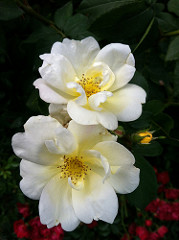

In [42]:
print(dataList[3])
roses = glob(dataList[3] + '/*.jpg')
PIL.Image.open(str(roses[0]))

#### [미션] 각 폴더단위로 jpg 데이터가 몇개씩 있는지 출력하고 각 폴더별 6개씩만 이미지 파일 출력해보기
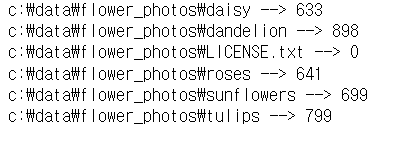

In [43]:
### 폴더단위로 jpg 몇개씩 있는지 확인해보기
for x in dataList:
    print(x, '-->', len(glob(x+'/*.jpg')))

c:\data\flower_photos\daisy --> 633
c:\data\flower_photos\dandelion --> 898
c:\data\flower_photos\LICENSE.txt --> 0
c:\data\flower_photos\roses --> 641
c:\data\flower_photos\sunflowers --> 699
c:\data\flower_photos\tulips --> 799


In [ ]:
### 각 폴더단위로 한줄에 6개씩 이미지 출력해보기


### [작업2] keras.preprocessing을 사용하여 로드하기
- 폴더에서 지정한 배치사이즈만큼 데이터를 읽고, 이미지의 너비높이의 크기를 조정함


In [34]:
batch_size = 32
img_height = 180
img_width = 180

In [44]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [78]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [79]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


### [작업3] keras.preprocessing로드 데이터 살펴보기

In [48]:
len(list(train_ds))

92

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([3, 4, 4, 4, 1, 0, 0, 1, 3, 0, 3, 4, 1, 1, 4, 2, 1, 4, 1, 2, 2, 1,
       2, 3, 4, 1, 4, 2, 1, 0, 4, 0])>

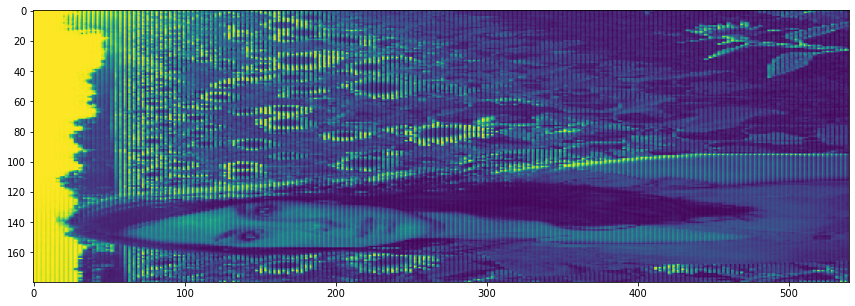

In [66]:
sample=list(train_ds)[0][0]
#sample=sample.astype('uint8')

plt.figure(figsize=(30,5))
plt.imshow(np.hstack(sample[0]))
list(train_ds)[0][1]

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([4, 4, 4, 4, 3, 0, 2, 0, 3, 2, 0, 3, 2, 4, 2, 1, 3, 3, 3, 1, 0, 1,
       4, 0, 4, 3, 3, 3, 2, 4, 0, 0])>

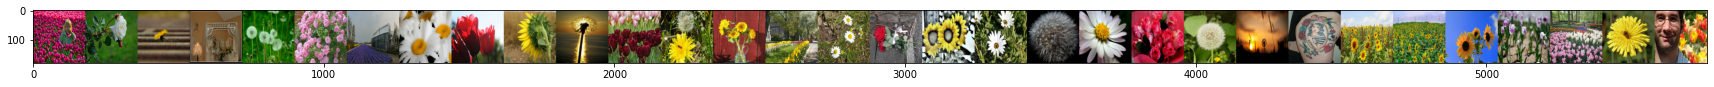

In [75]:
# 32개씩 모은 자료임
sample=list(train_ds)[1][0]
sample=np.array(sample, dtype='uint8')

plt.figure(figsize=(30,5))
plt.imshow(np.hstack(sample))

print(list(train_ds)[1][1])


### [작업4] 모델 제작하기

In [80]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
 5/92 [>.............................] - ETA: 30s - loss: 2.1982 - accuracy: 0.2812